# Prosper Loan Data Exploration
## by Ramy Makram Abdallah Gendy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling & Cleaning</a></li>
<li><a href="#univariate">Univarite Exploration</a></li>
<li><a href="#bivariate">Bivarite Exploration</a></li>
<li><a href="#multivariate">Multivarite Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>

</ul>

<a id='intro'></a>
## Introduction

In this project, I will explore a dataset of Prosper Loan data, which contains 113,937 rows and 81 columns. 
Will first do some data wrangling and cleaning, and then move on to different types of exploration to find relationships between different variables moving forward to our conclusion

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Load the datasets
loan = pd.read_csv("prosperLoanData.csv")

In [3]:
# high-level overview of data shape and composition
loan.shape

(113937, 81)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 characteristic. Most variables are numeric in nature, where some are categorical, boolean, also variables like EmploymentStatus ,Occupation are considered as factor variables. IsBorrowerHomeowner ,CurrentlyInGroup are binary variables .LoanStatus ,and BorrowerState are ordered factor variables. also other variables have a lot of null values, such as variables prosperrating and prosperscore, and some variables are not of much use, such as listingkey, listingnumber, of other identifiers.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in understanding and exploring which loan features are best for predicting a loan default

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 There are many features to explore, I expect that following features will have the largest effect on the performance of the LoanStatus:


1. __ProsperRating (Alpha)__ - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
2. __CreditGrade__ - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
3. __DebToIncomeRatio__ - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).


<a id = 'wrangling'></a>
## Data Wrangling & Cleaning

Will drop columns that will not be needed, work on categorical variables, then fix float and int variables based on the order.

In [7]:
loan_cleaned = loan.copy()

In [8]:
#replace the column names to lowercase and space with underscore for convenience:
loan_cleaned.columns = map(str.lower, loan_cleaned.columns)
loan_cleaned.columns = loan_cleaned.columns.str.replace(' ', '_')
# Remove not needed for the analysis:
loan_cleaned.drop(columns = ['listingkey', 'listingnumber', 'groupkey', 'loankey', 'loannumber', 'memberkey', 'closeddate'], inplace = True)
# fix categorical variables' null values:
categorical_columns = loan_cleaned.select_dtypes(include = 'object').columns
loan_cleaned[categorical_columns] = loan_cleaned[categorical_columns].fillna('unknown')
loan_cleaned.select_dtypes(include = 'object').isnull().sum()

listingcreationdate        0
creditgrade                0
loanstatus                 0
prosperrating_(alpha)      0
borrowerstate              0
occupation                 0
employmentstatus           0
datecreditpulled           0
firstrecordedcreditline    0
incomerange                0
loanoriginationdate        0
loanoriginationquarter     0
dtype: int64

In [9]:
#contiuned cleaning:
loan_cleaned.drop(columns = 'borrowerapr', inplace = True)
loan_cleaned.drop(columns = ['estimatedeffectiveyield', 'estimatedloss', 'estimatedreturn'], inplace = True)
loan_cleaned.drop(columns = ['prosperrating_(numeric)', 'prosperscore'], inplace = True)
loan_cleaned.dropna(subset = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper', \
                            'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies', \
                            'amountdelinquent', 'delinquencieslast7years'], inplace = True)
loan_cleaned.drop(columns = ['scorexchangeattimeoflisting', 'loanfirstdefaultedcyclenumber', 'lp_customerpayments',\
                          'lp_customerprincipalpayments', 'lp_interestandfees', 'lp_servicefees', 'lp_collectionfees',\
                          'lp_grossprincipalloss', 'lp_netprincipalloss', 'lp_nonprincipalrecoverypayments'], inplace = True)
loan_cleaned[loan_cleaned['debttoincomeratio'].isnull()][:5]

,listingcreationdate,creditgrade,term,loanstatus,borrowerrate,lenderyield,prosperrating_(alpha),listingcategory_(numeric),borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,currentlyingroup,datecreditpulled,creditscorerangelower,creditscorerangeupper,firstrecordedcreditline,currentcreditlines,opencreditlines,totalcreditlinespast7years,openrevolvingaccounts,openrevolvingmonthlypayment,inquirieslast6months,totalinquiries,currentdelinquencies,amountdelinquent,delinquencieslast7years,publicrecordslast10years,publicrecordslast12months,revolvingcreditbalance,bankcardutilization,availablebankcardcredit,totaltrades,tradesneverdelinquent_(percentage),tradesopenedlast6months,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,totalprosperloans,totalprosperpaymentsbilled,ontimeprosperpayments,prosperpaymentslessthanonemonthlate,prosperpaymentsonemonthpluslate,prosperprincipalborrowed,prosperprincipaloutstanding,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,loanoriginationdate,loanoriginationquarter,monthlyloanpayment,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
40,2014-01-27 12:02:57.523000000,unknown,60,Current,0.1725,0.1625,C,1,WA,Other,Self-employed,276.0,False,False,2014-01-25 10:47:25,680.0,699.0,1985-12-20 00:00:00,10.0,9.0,28.0,10,1233.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,61284.0,0.46,69166.0,28.0,1.00,2.0,NaN,"$100,000+",False,12750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,15000,2014-01-29 00:00:00,Q1 2014,374.81,1.0,0,0,0.0,3
69,2014-01-25 12:07:54.537000000,unknown,60,Current,0.1139,0.1039,A,1,IL,Investor,Self-employed,12.0,True,True,2014-01-25 11:51:41,700.0,719.0,1995-08-01 00:00:00,5.0,5.0,21.0,3,373.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19961.0,0.79,5039.0,21.0,1.00,0.0,NaN,"$25,000-49,999",False,2700.0,3.0,16.0,16.0,0.0,0.0,7861.0,0.02,0,2,9000,2014-01-29 00:00:00,Q1 2014,197.44,1.0,0,0,0.0,1
78,2008-06-29 23:23:40.157000000,A,36,Chargedoff,0.1700,0.1600,unknown,3,CA,Realtor,Full-time,68.0,True,False,2008-06-29 23:13:04.860000000,720.0,739.0,1995-11-29 00:00:00,14.0,14.0,26.0,9,962.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,33572.0,0.73,9355.0,24.0,1.00,1.0,NaN,$0,False,0.0,1.0,6.0,6.0,0.0,0.0,7750.0,6725.84,1918,68,4800,2008-07-08 00:00:00,Q3 2008,171.13,1.0,0,0,0.0,115
100,2013-01-25 11:48:26.040000000,unknown,36,Chargedoff,0.3134,0.3034,HR,13,CA,Other,Not employed,12.0,False,False,2013-01-11 12:10:13,720.0,739.0,2000-09-10 00:00:00,3.0,3.0,10.0,3,56.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5641.0,0.22,19359.0,4.0,1.00,1.0,NaN,Not employed,False,0.0,1.0,11.0,7.0,4.0,0.0,5000.0,3802.10,314,14,4000,2013-01-30 00:00:00,Q1 2013,172.76,1.0,0,0,0.0,73
103,2012-04-17 11:58:52.270000000,unknown,36,Chargedoff,0.2287,0.2187,D,3,CO,Truck Driver,Self-employed,29.0,True,False,2012-04-17 11:58:46,680.0,699.0,1993-10-26 00:00:00,9.0,7.0,21.0,1,699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28228.0,0.98,502.0,18.0,0.77,0.0,NaN,"$50,000-74,999",False,5000.0,1.0,29.0,28.0,1.0,0.0,15000.0,3813.03,384,23,15000,2012-04-19 00:00:00,Q2 2012,579.63,1.0,0,0,0.0,21


In [10]:
loan_cleaned['debttoincomeratio'].fillna(loan_cleaned['monthlyloanpayment'] / loan_cleaned['statedmonthlyincome'], inplace = True)
loan_cleaned[loan_cleaned['debttoincomeratio'] == np.inf]['debttoincomeratio'].value_counts()

inf    1327
Name: debttoincomeratio, dtype: int64

In [11]:
loan_cleaned['debttoincomeratio'].replace(np.inf, np.nan, inplace = True)
loan_cleaned['debttoincomeratio'].fillna(loan_cleaned['monthlyloanpayment'] / (loan_cleaned['statedmonthlyincome'] + 1), inplace = True)

In [12]:
columns = ['totalprosperloans', 'totalprosperpaymentsbilled', 'ontimeprosperpayments', 'prosperpaymentslessthanonemonthlate',\
            'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed', 'prosperprincipaloutstanding']
for col in columns:
    loan_cleaned[col].fillna(0, inplace = True)
    
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106290 entries, 0 to 113936
Data columns (total 58 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listingcreationdate                  106290 non-null  object 
 1   creditgrade                          106290 non-null  object 
 2   term                                 106290 non-null  int64  
 3   loanstatus                           106290 non-null  object 
 4   borrowerrate                         106290 non-null  float64
 5   lenderyield                          106290 non-null  float64
 6   prosperrating_(alpha)                106290 non-null  object 
 7   listingcategory_(numeric)            106290 non-null  int64  
 8   borrowerstate                        106290 non-null  object 
 9   occupation                           106290 non-null  object 
 10  employmentstatus                     106290 non-null  object 
 11  employmentsta

<a id = 'univariate'></a>
## Univariate Exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Will start by looking at the main variable of interest "LoanStatus" :


In [13]:
loan_cleaned.loanstatus.value_counts()

Current                   56566
Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: loanstatus, dtype: int64

> there are only 2 loan status: 1 & 0, where 1 means default, and 0 means no default. But from the value counts here, we can see there are more than 2 states, so for analysis propose, will encode completed loans as 1, all past dues as 0 assuming that all past due loans are going to default, and I will ignore rows with loan status as current, cancelled, and finalpaymentinprogress.

Text(0.5, 1.0, 'default percentage')

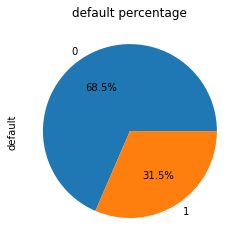

In [14]:
loan_analysis = loan_cleaned[loan_cleaned['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', \
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]

loan_analysis['default'] = np.where(loan_analysis['loanstatus'] == 'Completed', 0, 1)

loan_analysis['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('default percentage')

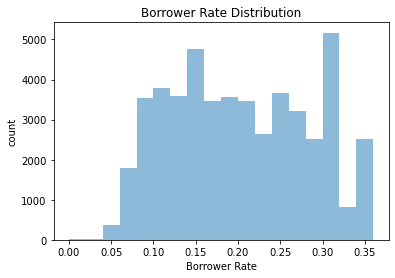

In [15]:
# univariate plots of borrowerrate
base_color = sb.color_palette()[0]
bins = np.arange(0, loan_analysis['borrowerrate'].max() + 0.01, 0.02);
plt.hist(data = loan_analysis, x = 'borrowerrate', bins = bins, alpha = 0.5, color = base_color);
plt.title('Borrower Rate Distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('count');

 The borrower rate has 2 outliers at 0.15 and 0.31, where most of the borrower rates lie between 0.07 and 0.30.

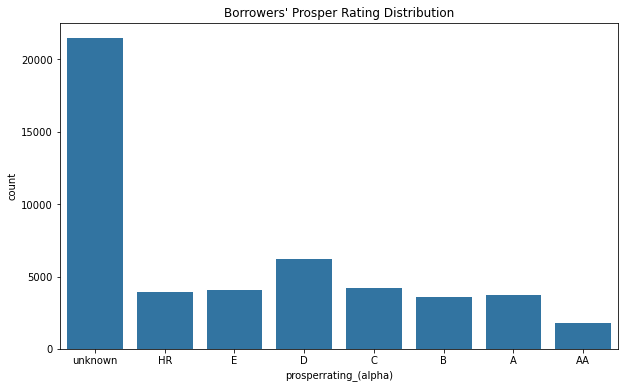

In [16]:
# univariate plots of prosperrating_(alpha)
prosperrating_classes = ['unknown', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
loan_analysis['prosperrating_(alpha)'] = pd.Categorical(loan_analysis['prosperrating_(alpha)'], categories = prosperrating_classes, ordered = True)
plt.subplots(figsize = (10, 6))
sb.countplot(data = loan_analysis, x = 'prosperrating_(alpha)', color = base_color);
plt.title("Borrowers' Prosper Rating Distribution");

too much unknown data needed to be removed to continue with out assumptions

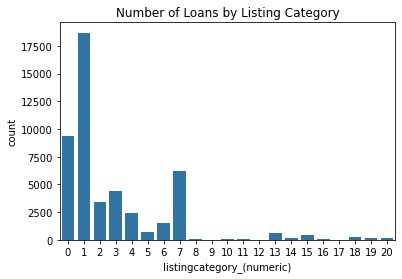

In [17]:
# univariate plots of listingcategory_(numeric)
sb.countplot(data = loan_analysis, x = 'listingcategory_(numeric)', color = base_color);
plt.title('Number of Loans by Listing Category');

Certain categories have more loans, which need to investigate if there's a correlation between listing category and the rate

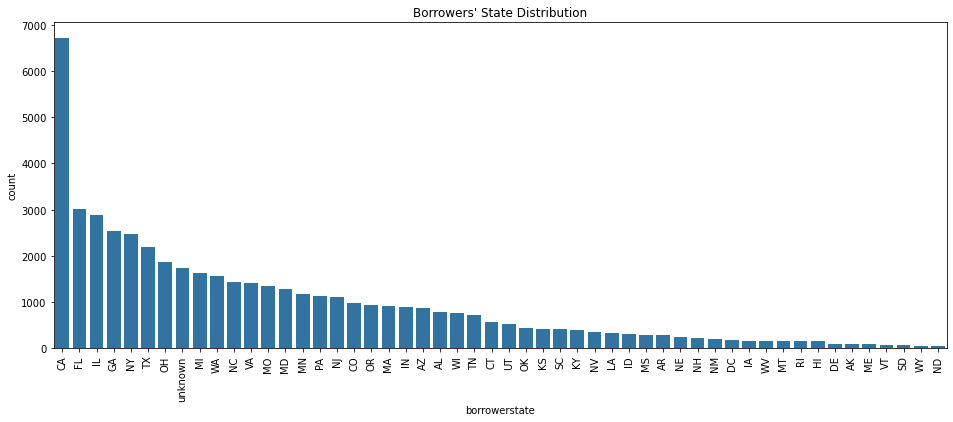

In [18]:
# univariate plots of borrowerstate
state_order = loan_analysis['borrowerstate'].value_counts().index
plt.subplots(figsize = (16, 6));
sb.countplot(data = loan_analysis, x = 'borrowerstate', color = base_color, order = state_order);
plt.xticks(rotation = 90);
plt.title("Borrowers' State Distribution");

California hold the highest borrow rate state. will investigate which state has the highest average default rate, in the next section of the bivariate analysis.

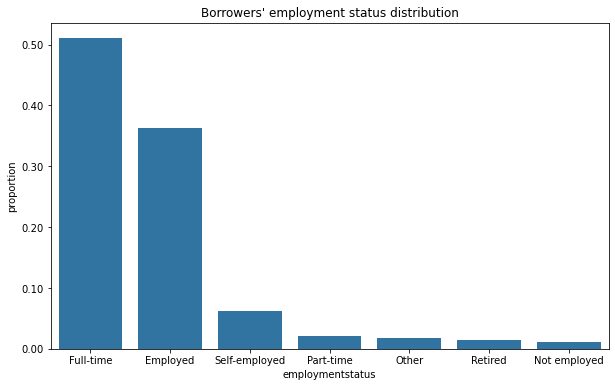

In [19]:
# univariate plots of employmentstatus
type_counts = loan_analysis['employmentstatus'].value_counts()
type_order = type_counts.index
n_employment = loan_analysis['employmentstatus'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_employment
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.subplots(figsize = (10, 6))
base_color = sb.color_palette()[0]
sb.countplot(data = loan_analysis, x = 'employmentstatus', color = base_color, order = type_order);
plt.yticks(tick_props * n_employment, tick_names);
plt.ylabel('proportion');
plt.title("Borrowers' employment status distribution");

In [20]:
loan_analysis['incomerange'].unique()

array(['$25,000-49,999', '$1-24,999', '$50,000-74,999', '$75,000-99,999',
       '$100,000+', 'Not employed', '$0', 'Not displayed'], dtype=object)

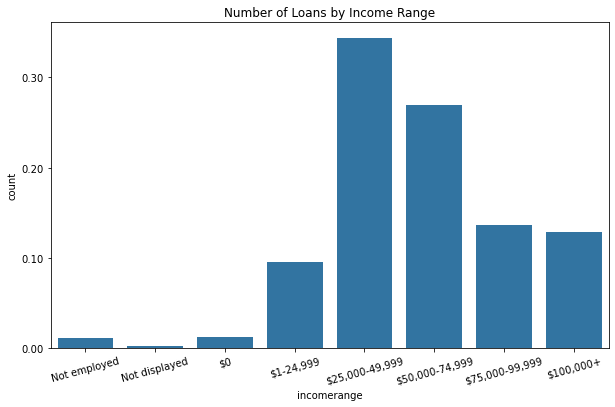

In [21]:
# univariate plots of incomerange 
income_classes = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
loan_analysis['incomerange'] = pd.Categorical(loan_analysis['incomerange'], categories = income_classes, ordered = True)
income_counts = loan_analysis['incomerange'].value_counts()
n_income = loan_analysis['incomerange'].value_counts().sum()
max_income_count = income_counts[0]
max_prop_income = max_income_count / n_income
tick_props = np.arange(0, max_prop_income, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.subplots(figsize = (10, 6))
base_color = sb.color_palette()[0]
sb.countplot(data = loan_analysis, x = 'incomerange', color = base_color);
plt.yticks(tick_props * n_income, tick_names) 
plt.xticks(rotation = 15);
plt.title('Number of Loans by Income Range');

it's clear that most of the borrowers have a job with  income range 25,000 - 49,999 and only less than 10% of the borrowers are either retired/ not employed or other. This corresponds with income range as well, which only arounds 5% of the borrowers did not have income.

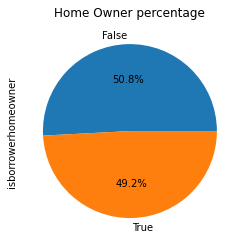

In [22]:
# univariate plots of isborrowerhomeowner
loan_analysis['isborrowerhomeowner'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('Home Owner percentage');

Around ~ 50% of the borrowers already home owners, will investigate if there's a correlation between home owners and default?

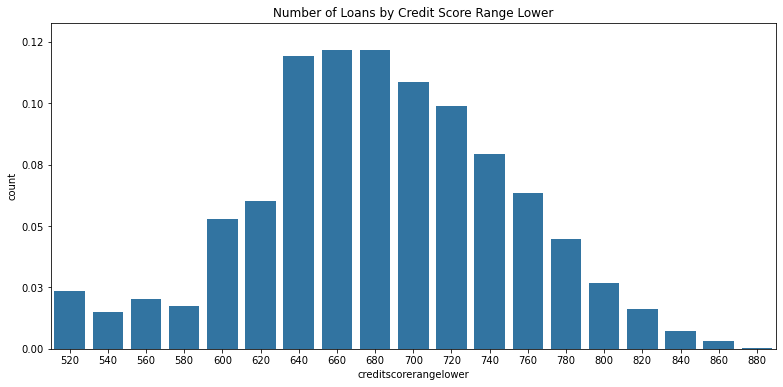

In [23]:
# univariate plots of creditscorerangelower
credit_counts = loan_analysis['creditscorerangelower'].value_counts()
n_credit = loan_analysis['creditscorerangelower'].value_counts().sum()
max_credit_count = income_counts[0]
max_prop_credit = max_credit_count / n_credit
tick_props = np.arange(0, max_prop_credit, 0.025)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
loan_analysis['creditscorerangelower'] = loan_analysis['creditscorerangelower'].apply(int)
plt.subplots(figsize = (13, 6))
sb.countplot(data = loan_analysis, x = 'creditscorerangelower', color = base_color)
plt.yticks(tick_props * n_income, tick_names);
plt.title('Number of Loans by Credit Score Range Lower')
plt.ylim(0, 6500);

Credit score range lower concentrates on 640 - 720.



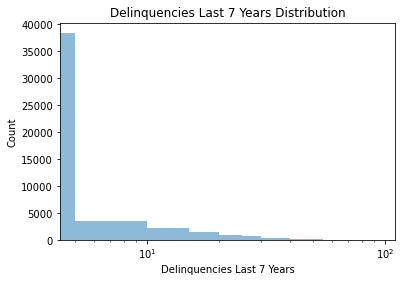

In [24]:
# univariate plots of delinquencieslast7years
bins = np.arange(0, loan_analysis['delinquencieslast7years'].max() + 1, 5);
plt.hist(data = loan_analysis, x = 'delinquencieslast7years', bins = bins, alpha = 0.5);
plt.xscale('log');
plt.title('Delinquencies Last 7 Years Distribution');
plt.xlabel('Delinquencies Last 7 Years');
plt.ylabel('Count');

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Since total delinquencies last 7 years skewed, will do transformation.

In [25]:
np.log10(loan_analysis['delinquencieslast7years'].describe())

count    4.689744
mean     0.617525
std      1.001410
min          -inf
25%          -inf
50%          -inf
75%      0.477121
max      1.995635
Name: delinquencieslast7years, dtype: float64

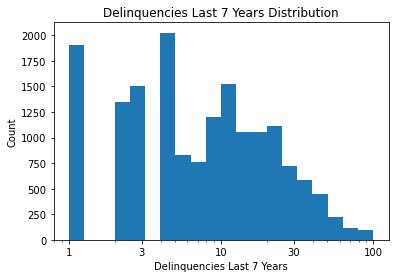

In [26]:
# Most of the borrowers had no delinquencies in the last 7 years, will plot only rows with deliquencies.
bins = 10 ** np.arange(0, 2 + 0.1, 0.1)
ticks = [1, 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = loan_analysis, x = 'delinquencieslast7years', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.title('Delinquencies Last 7 Years Distribution');
plt.xlabel('Delinquencies Last 7 Years');
plt.ylabel('Count');

Total delinquencies in the last 7 years can go as high as 100 times, but most of them are under 30 times. 

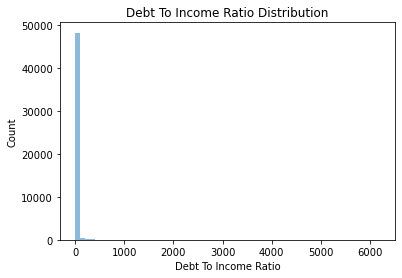

In [27]:
# univariate plots of debttoincomeratio
bins = np.arange(0, loan_analysis['debttoincomeratio'].max() + 1, 100);
plt.hist(data = loan_analysis, x = 'debttoincomeratio', bins = bins, alpha = 0.5);
plt.title('Debt To Income Ratio Distribution');
plt.xlabel('Debt To Income Ratio');
plt.ylabel('Count');

In [28]:
loan_analysis['debttoincomeratio'].describe()

count    48949.000000
mean         5.711041
std         57.857881
min          0.000000
25%          0.120000
50%          0.200000
75%          0.310000
max       6291.865167
Name: debttoincomeratio, dtype: float64

In [29]:
np.log10(loan_analysis['debttoincomeratio'].describe())

count    4.689744
mean     0.756715
std      1.762363
min          -inf
25%     -0.920819
50%     -0.698970
75%     -0.508638
max      3.798779
Name: debttoincomeratio, dtype: float64

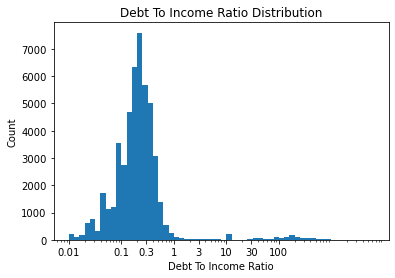

In [30]:
# postive value rows with debttoincomeratio plot
bins = 10 ** np.arange(-2, 3.8 + 0.1, 0.1)
ticks = [0.01, 0.1, 0.3, 1, 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = loan_analysis, x = 'debttoincomeratio', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.title('Debt To Income Ratio Distribution');
plt.xlabel('Debt To Income Ratio');
plt.ylabel('Count');

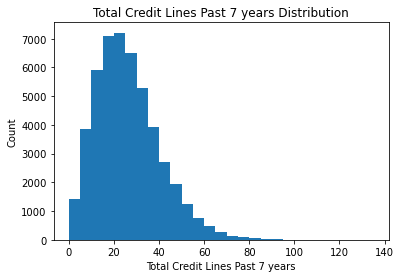

In [31]:
# univariate plots of totalcreditlinespast7years
bins = np.arange(0, loan_analysis['totalcreditlinespast7years'].max() + 1, 5);
plt.hist(data = loan_analysis, x = 'totalcreditlinespast7years', bins = bins);
plt.title('Total Credit Lines Past 7 years Distribution');
plt.xlabel('Total Credit Lines Past 7 years');
plt.ylabel('Count');

Since the plot is skewed, will do another transformation

In [32]:
np.log(loan_analysis['totalcreditlinespast7years'].describe())

count    10.798534
mean      3.249056
std       2.658270
min       0.693147
25%       2.708050
50%       3.178054
75%       3.526361
max       4.912655
Name: totalcreditlinespast7years, dtype: float64

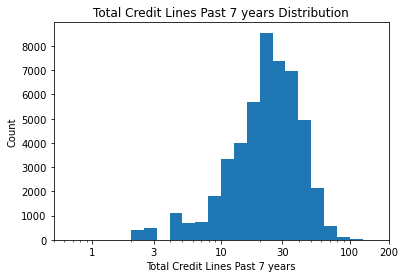

In [33]:
bins = 10 ** np.arange(0, 4.9 + 0.1, 0.1)
ticks = [1, 3, 10, 30, 100, 200]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = loan_analysis, x = 'totalcreditlinespast7years', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim(0.5, 200);
plt.title('Total Credit Lines Past 7 years Distribution');
plt.xlabel('Total Credit Lines Past 7 years');
plt.ylabel('Count');

borrowers have at least 10 to 40 credit lines which is reasonable.

<a id = 'bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between exploring borrowerrate and default rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


#### Firstly, Does the Default correlate with borrowerrate?

Text(0.5, 1.0, 'Borrower Rate by Default State')

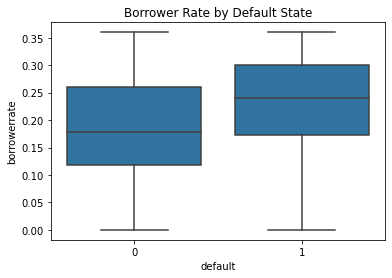

In [34]:
sb.boxplot(data = loan_analysis, x = 'default', y = 'borrowerrate', color = base_color);
plt.title('Borrower Rate by Default State')

 the borrowerrate is higher.

#### Does the income correlate and affect the borrowerrate?

$25,000-49,999    16826
$50,000-74,999    13184
$75,000-99,999     6681
$100,000+          6299
$1-24,999          4668
$0                  607
Not employed        546
Not displayed       138
Name: incomerange, dtype: int64


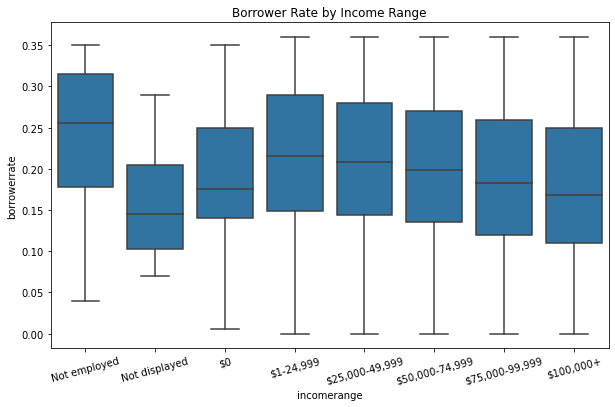

In [35]:
plt.subplots(figsize = (10, 6));
sb.boxplot(data = loan_analysis, x = 'incomerange', y = 'borrowerrate', color = base_color);
plt.xticks(rotation = 15);
plt.title('Borrower Rate by Income Range');
print(income_counts)

 at income is more than one, the average borrower rate tends to go down as imcome range goes up where Not employed group tend to have higher borrowerrate than any other groups which is reasonable because they have stable income.

#### Does credit score correlate with borrowerrate?

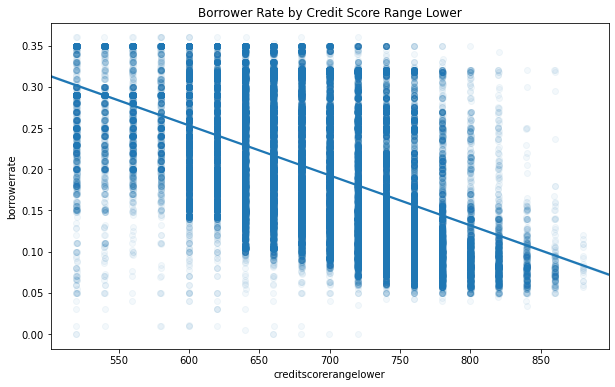

In [36]:
plt.figure(figsize = (10, 6))
sb.regplot(data = loan_analysis, x = 'creditscorerangelower', y = 'borrowerrate', truncate = False, x_jitter = 0.3, scatter_kws={'alpha':1/20});
plt.xlabel('creditscorerangelower')
plt.ylabel('borrowerrate');
plt.title('Borrower Rate by Credit Score Range Lower');

a negative correlation is present between The borrowerrate and credit score.

#### Does income group has coleration with defaults?

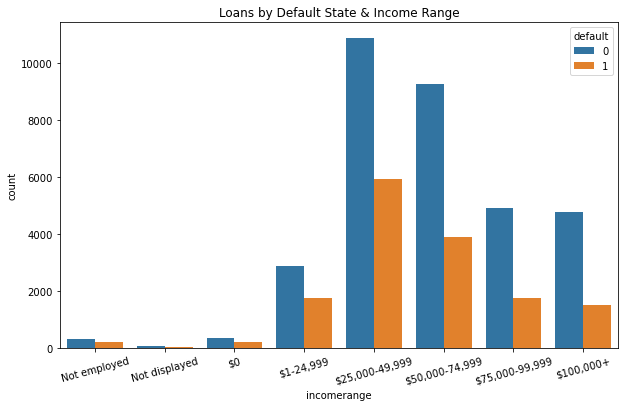

In [37]:
# Let's look at correlation between incomerange and default too.
plt.subplots(figsize = (10, 6))
sb.countplot(data = loan_analysis, x = 'incomerange', hue = 'default');
plt.xticks(rotation = 15);
plt.title('Loans by Default State & Income Range');

From previously and from above we found most borrowers with income range 25,000 - 49,999 and we can also know that more defaulted loans came from that range too. But which group have the highest default rate?

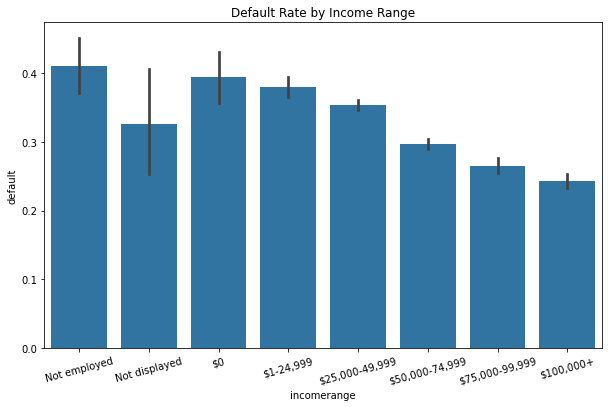

In [38]:
plt.figure(figsize = (10, 6))
sb.barplot(data = loan_analysis, x = 'incomerange', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.title('Default Rate by Income Range');

the highest default rate did not come from income range 25,000 - 49,999, it's actually come from Not Employed and $0 group

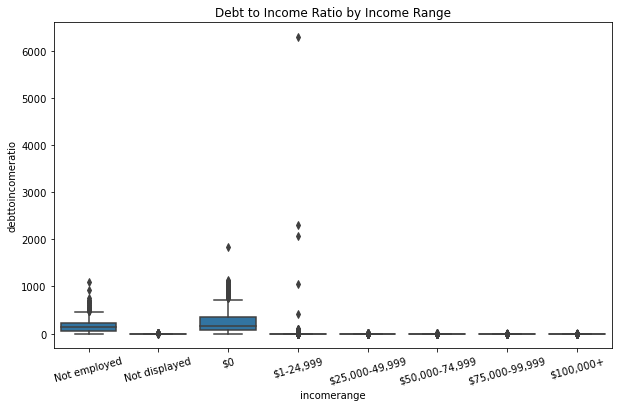

In [39]:
plt.figure(figsize = (10, 6))
sb.boxplot(data = loan_analysis, x = 'incomerange', y = 'debttoincomeratio', color = base_color);
plt.xticks(rotation = 15);
plt.title('Debt to Income Ratio by Income Range');

Group Not Employed & \\$0 have high Debt to Income Ratio on average and group \\$1 - \\$24,999 has some pretty high outliers. we can't ignore those outliers but we can seperate these groups

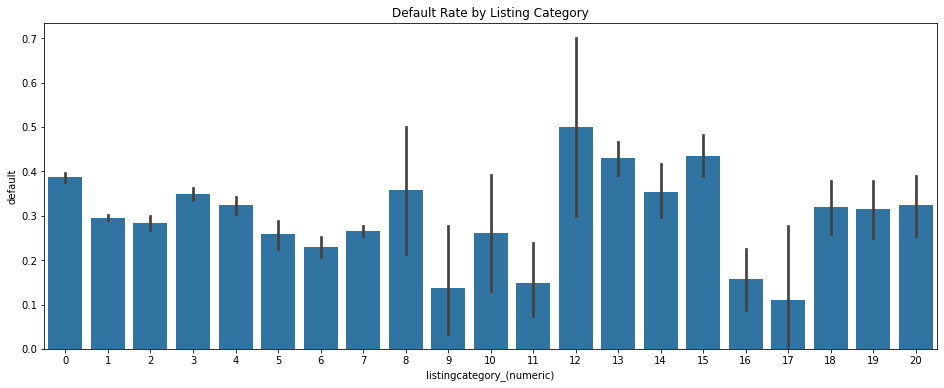

In [40]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = loan_analysis, x = 'listingcategory_(numeric)', y = 'default', color = base_color);
plt.title('Default Rate by Listing Category');

Certain types of loans do have higher default rate on average.

#### Is there difference in each state default rate?

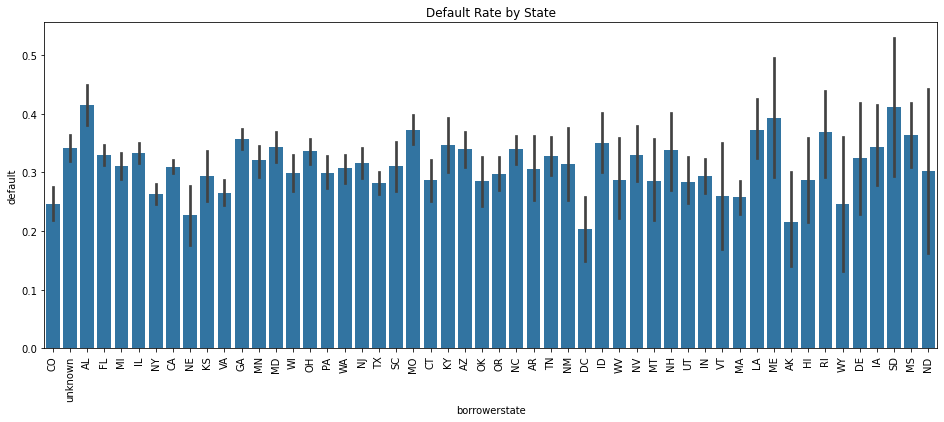

In [41]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = loan_analysis, x = 'borrowerstate', y = 'default', color = base_color);
plt.xticks(rotation = 90);
plt.title('Default Rate by State');

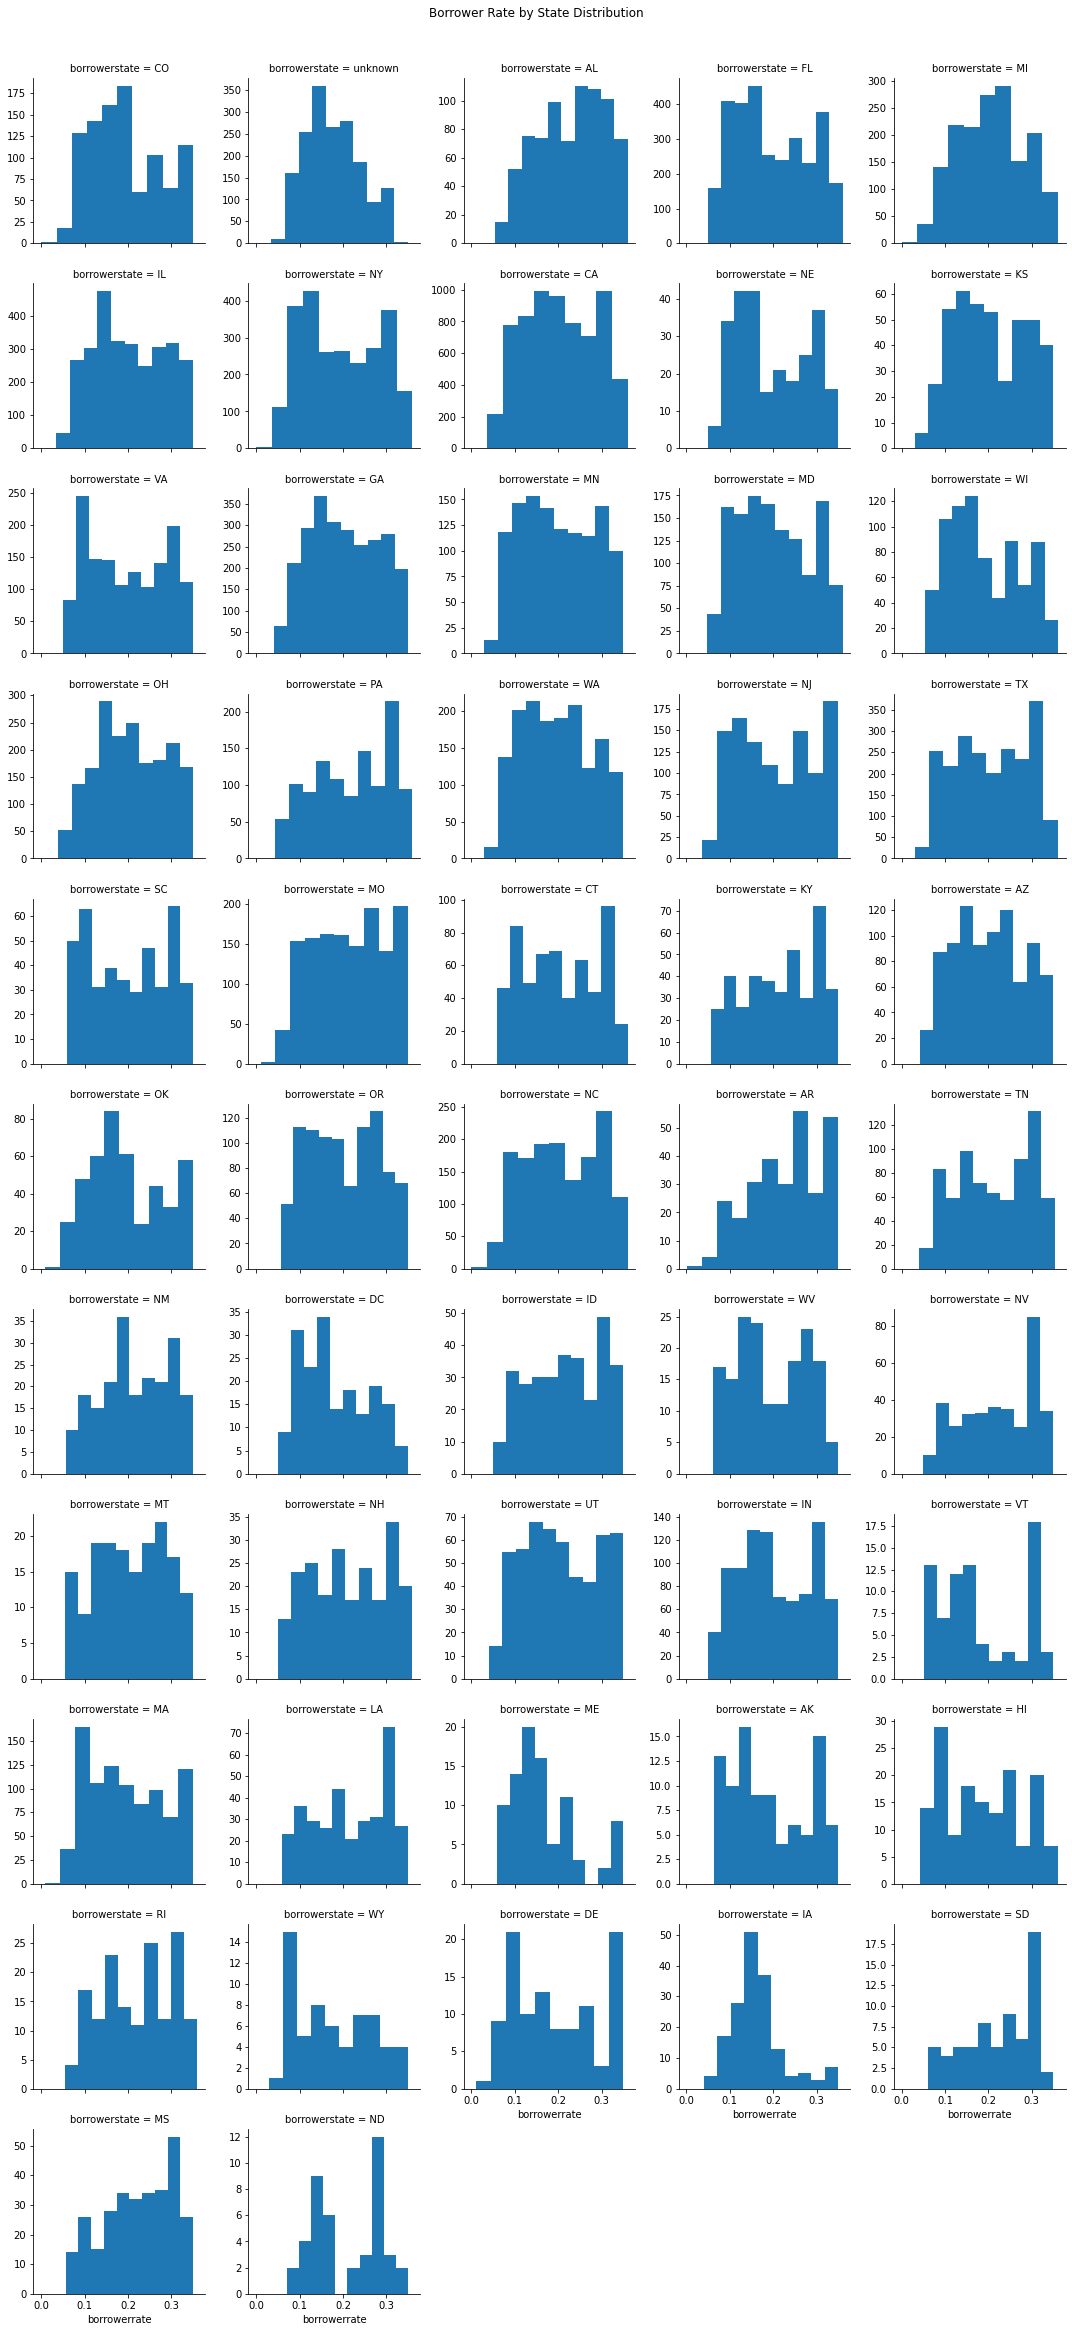

In [42]:
g = sb.FacetGrid(data = loan_analysis, col = 'borrowerstate', col_wrap=5, sharey=False)
g.map(plt.hist, 'borrowerrate');
g.fig.subplots_adjust(top = 0.95);
g.fig.suptitle('Borrower Rate by State Distribution');

each state has its own unique default rate.

#### Does the credit score lower range corelate with default rate?

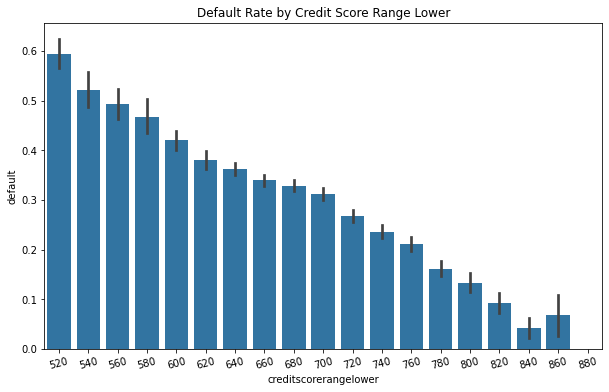

In [43]:
plt.subplots(figsize = (10, 6))
sb.barplot(data = loan_analysis, x = 'creditscorerangelower', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.title('Default Rate by Credit Score Range Lower');

a strong negative correlation between credit score lower range and default rate.

#### Does debttoincomeratio colerate with default rate?

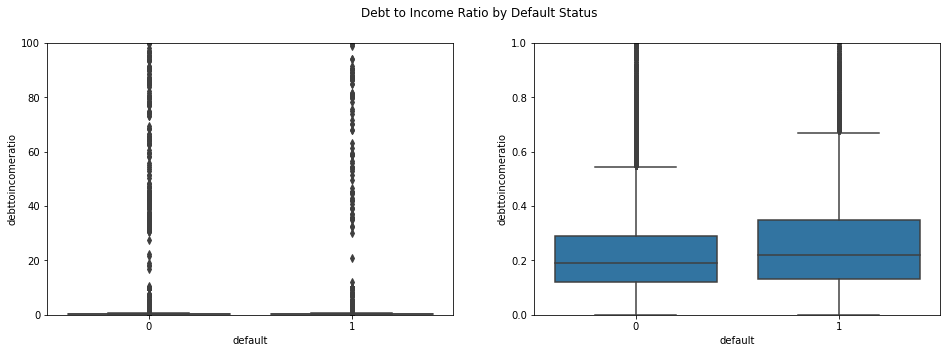

In [44]:
fig = plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = loan_analysis, x = 'default', y = 'debttoincomeratio', color = base_color);
plt.ylim(0, 100);
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data = loan_analysis, x = 'default', y = 'debttoincomeratio', color = base_color);
plt.ylim(0, 1);
fig.suptitle('Debt to Income Ratio by Default Status');

From debttoincomeratio < 1, the default group has a higher range of debttoincomeratio than the non-default group.

#### Does being a homeowner correlated with default rate?

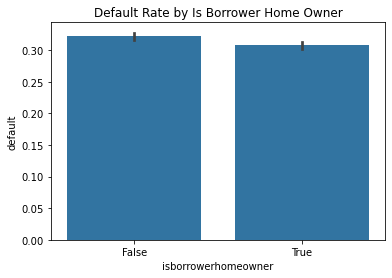

In [45]:
sb.barplot(data = loan_analysis, x = 'isborrowerhomeowner', y = 'default', color = base_color);
plt.title('Default Rate by Is Borrower Home Owner');

almost equal which deduce no significant meaning.

#### Do the number of credit lines correlate with default rate?

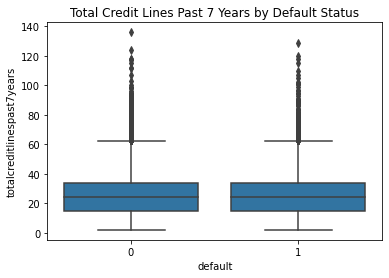

In [46]:
sb.boxplot(data = loan_analysis, x = 'default', y = 'totalcreditlinespast7years', color = base_color);
plt.title('Total Credit Lines Past 7 Years by Default Status');

almost equal which deduce no significant meaning.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> borrowers who the highest default rate did not come from income range 25,000 - 49,999, it's actually come from Not Employed and $0 group.

<a id = 'multivariate'></a>
## Multivariate Exploration

> The main feature to explore is how the Borrower Rate relate with Credit Score & Default


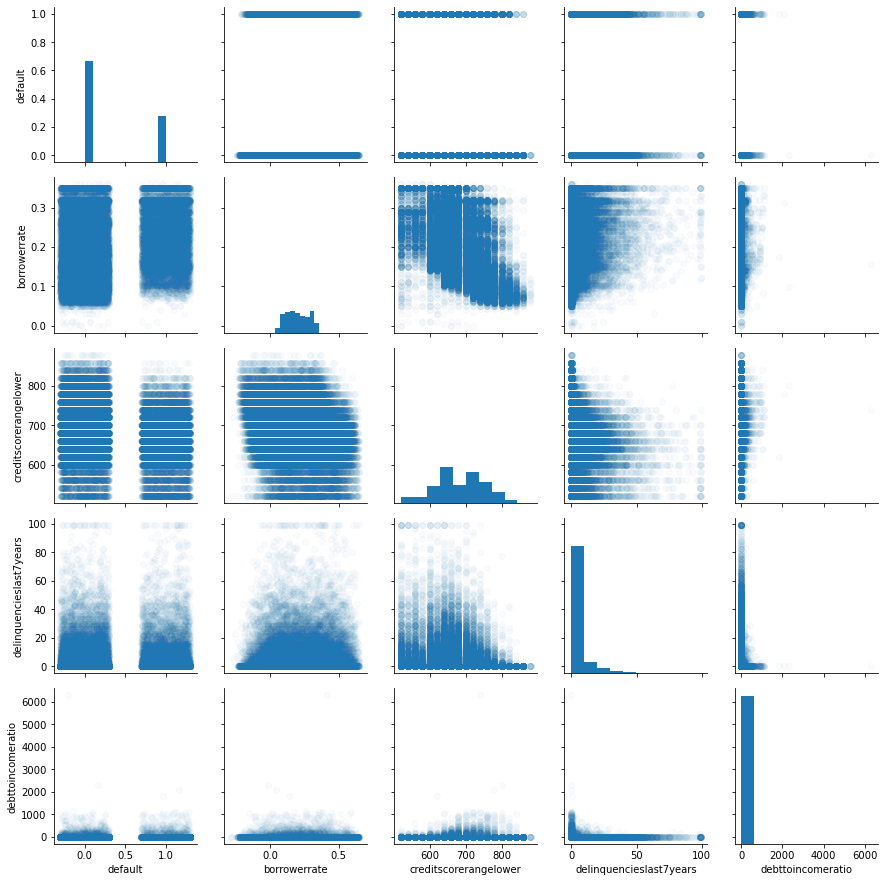

In [47]:
g = sb.PairGrid(data = loan_analysis, vars = ['default', 'borrowerrate', 'creditscorerangelower', \
                                              'delinquencieslast7years', 'debttoincomeratio'])
g.map_diag(plt.hist)
g.map_offdiag(sb.regplot, truncate = False, x_jitter = 0.3, scatter_kws = {'alpha': 1/40}, fit_reg = False);

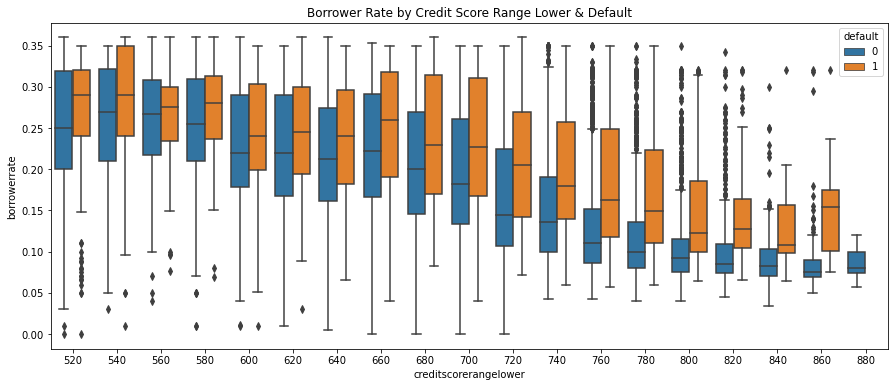

In [48]:
plt.figure(figsize = (15, 6))
sb.boxplot(data = loan_analysis, x = 'creditscorerangelower', y = 'borrowerrate', hue = 'default');
plt.title('Borrower Rate by Credit Score Range Lower & Default');

with each credit score, we see that the borrower rate for default group are going higher.

And from the bivariate analysis, we know that Not Employed and 0 group have much higher Debt to Income Ratio on average. And group $1 - $24,999 has high outliers. so will seperate these group in the analysis:

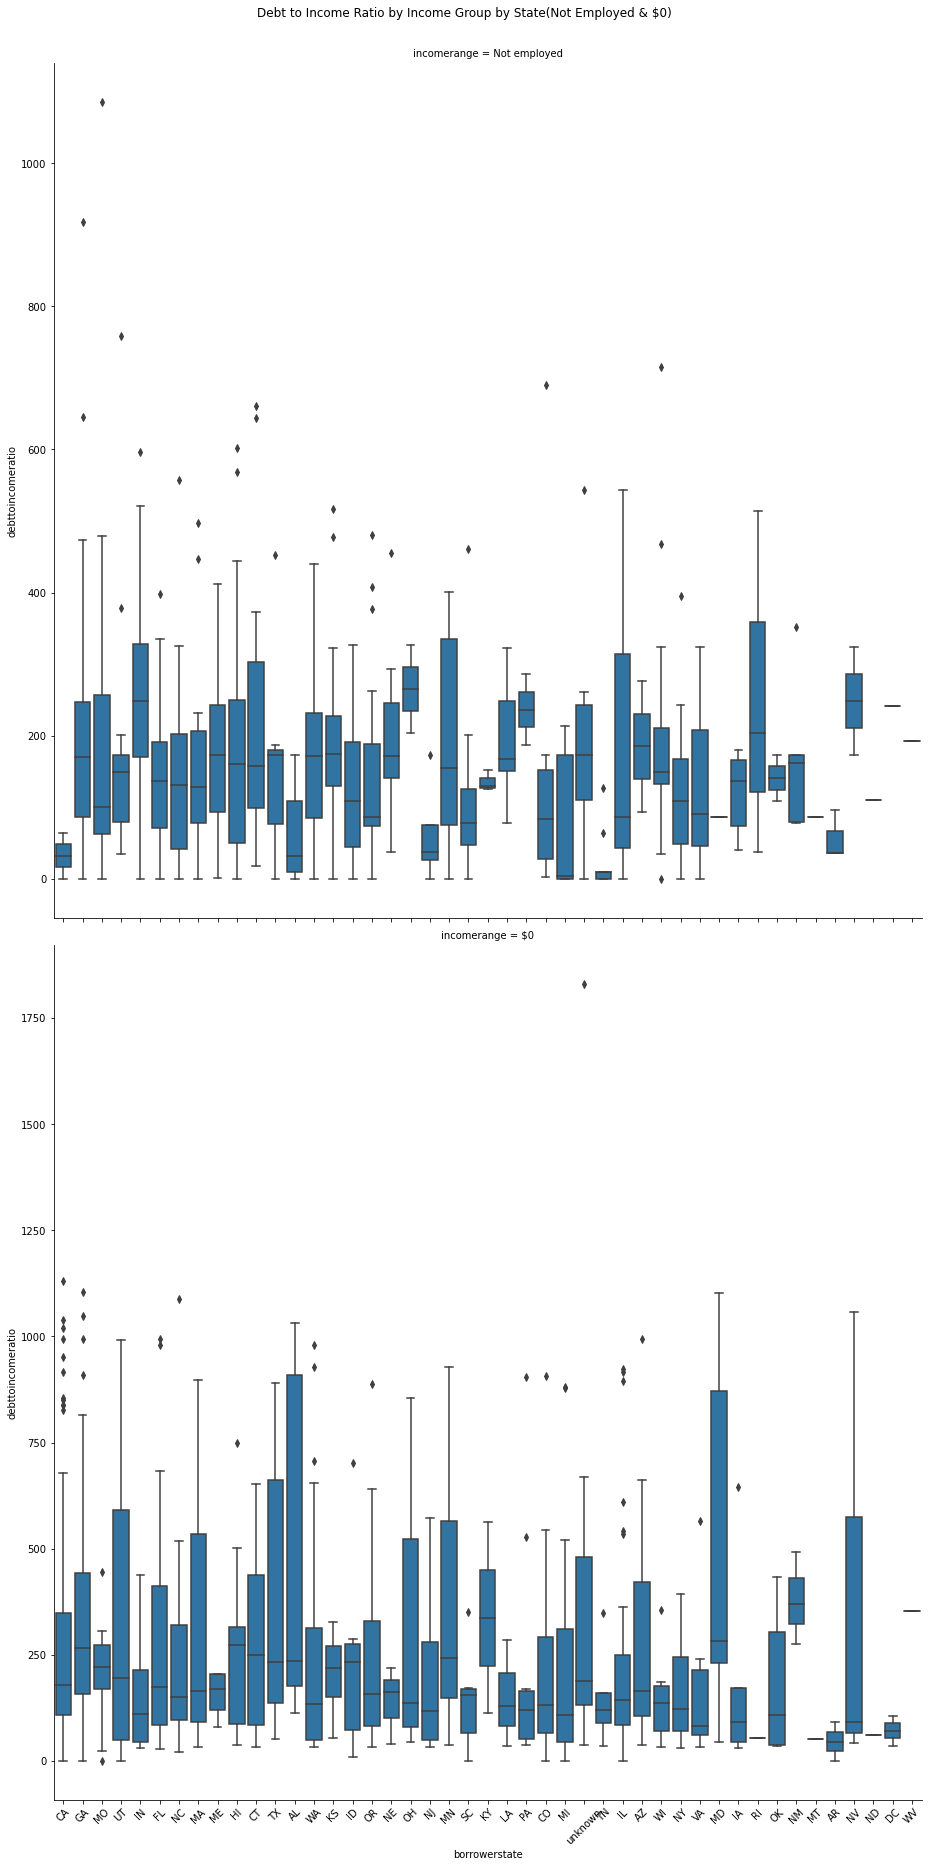

In [49]:
# Group Not Employed and $0
no_salary = loan_analysis.loc[loan_analysis['incomerange'].isin(['$0', 'Not employed']), ['incomerange', 'borrowerstate', 'debttoincomeratio']]
no_salary['incomerange'] = no_salary['incomerange'].astype(str)
g = sb.FacetGrid(data = no_salary, col = 'incomerange', col_wrap = 1, size = 13, sharey = False, margin_titles = True);
g.map(sb.boxplot, 'borrowerstate', 'debttoincomeratio');
plt.xticks(rotation = 45);
g.fig.subplots_adjust(top = 0.95);
g.fig.suptitle('Debt to Income Ratio by Income Group by State(Not Employed & $0)');

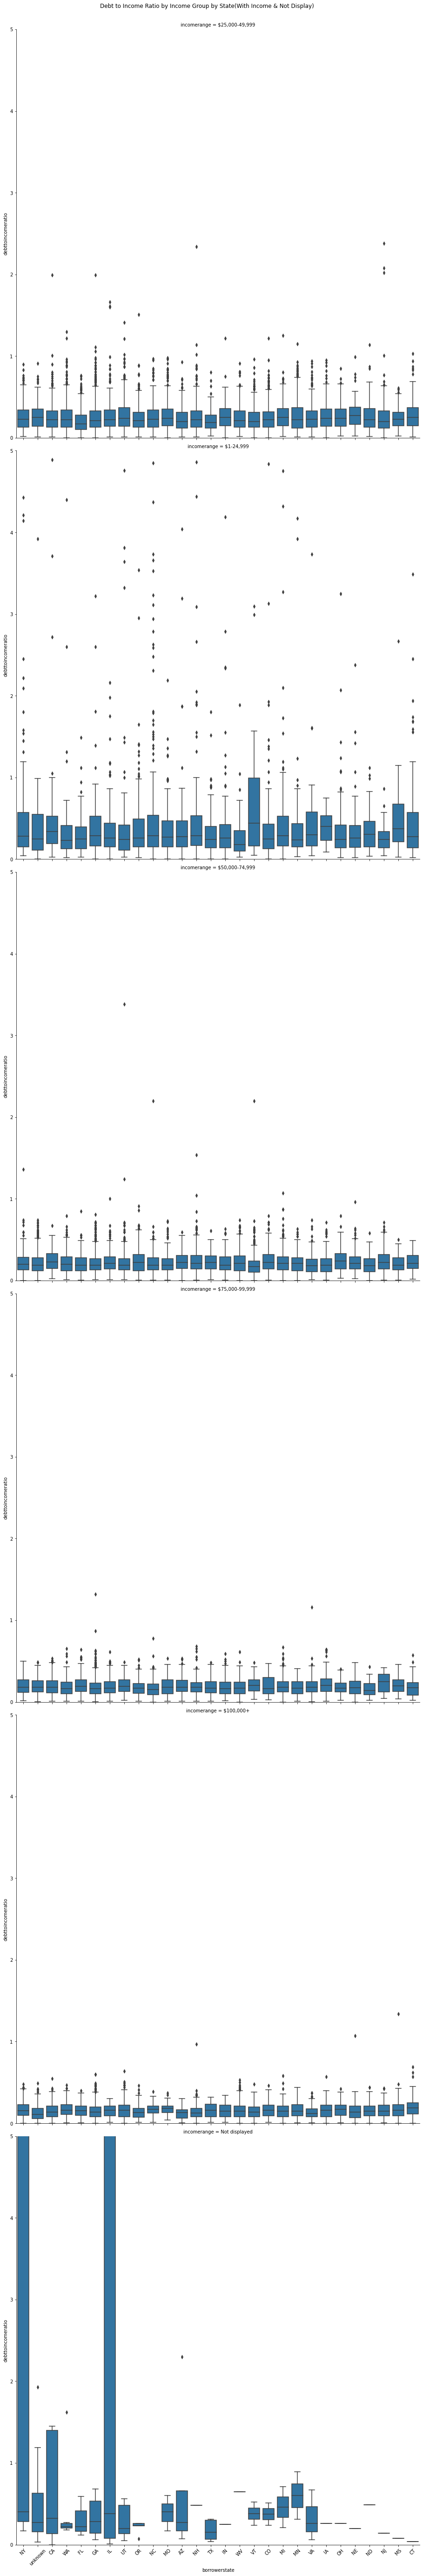

In [50]:
# Group excluding Not Employed and $0
salary = loan_analysis.loc[~loan_analysis['incomerange'].isin(['$0', 'Not employed']), ['incomerange', 'borrowerstate', 'debttoincomeratio']]
salary['incomerange'] = salary['incomerange'].astype(str)
g = sb.FacetGrid(data = salary, col = 'incomerange', col_wrap = 1, size = 13);
g.map(sb.boxplot, 'borrowerstate', 'debttoincomeratio');
plt.ylim(0, 5);
plt.xticks(rotation = 45);
g.fig.subplots_adjust(top = 0.97);
g.fig.suptitle('Debt to Income Ratio by Income Group by State(With Income & Not Display)');

The Not Employed and 0 group have much higher debt to income ratio than other income groups.

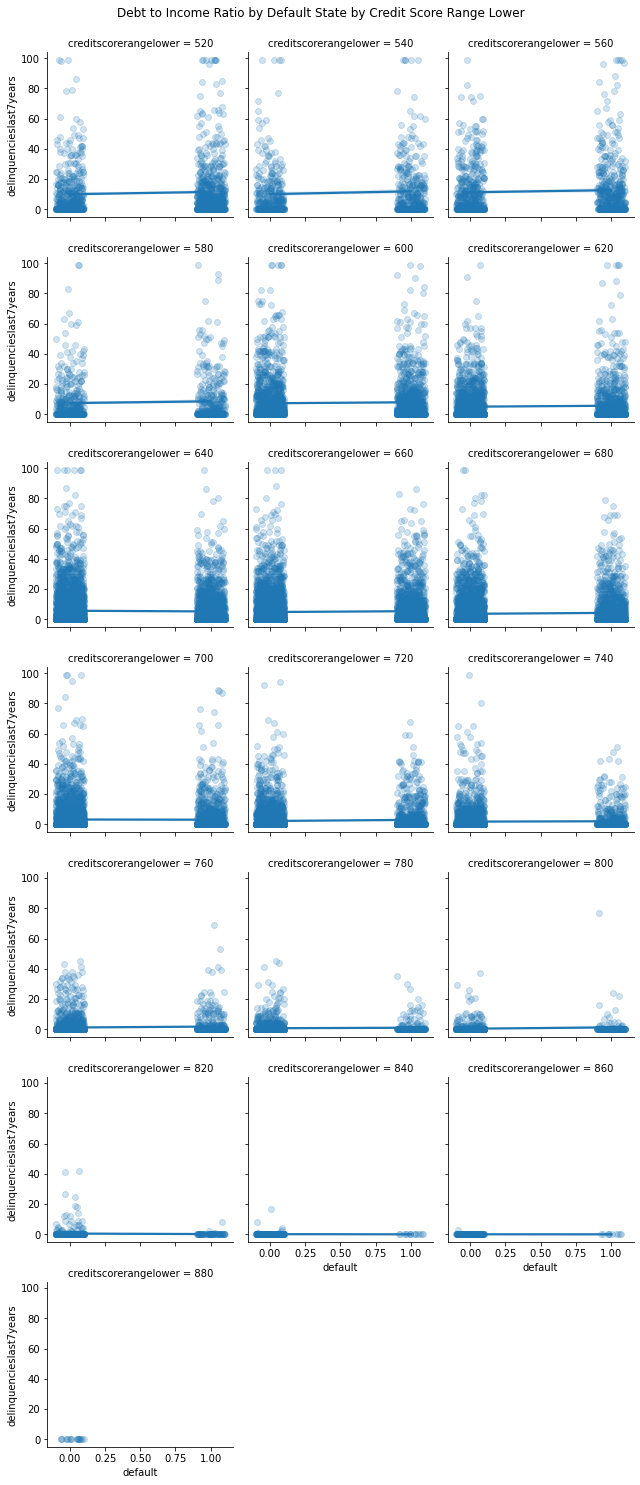

In [51]:
g = sb.FacetGrid(data = loan_analysis, col = 'creditscorerangelower', col_wrap = 3);
g.map(sb.regplot, 'default', 'delinquencieslast7years', x_jitter = 0.1, scatter_kws = {'alpha': 1/5});
g.fig.subplots_adjust(top = 0.95);
g.fig.suptitle('Debt to Income Ratio by Default State by Credit Score Range Lower');

There's not significant difference between these two groups in terms of delinquencies in the last 7 years.

<a id ='conclusions'></a>
## Conclusion

borrower rate, credit score, income range, listing type, debt to income ratio and state are the main variable resposible for Defaulting loans in the model. 

<a id ='References'></a>
## References

1. classroom.udacity.com
2. stackoverflow.com
3. numpy.org
4. pandas.pydata.org
5. python.org
6. en.wikipedia.org
7. stackexchange.com
8. seaborn.pydata.org